# Grupo Games

##Importando bibliotecas

In [ ]:
#
# Export do twitch caso precise mudar algo
#
# from google.colab import drive
# import pandas as pd
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/Referência Geral/Estudo/Cursos/Data Science/TERA/Grupo Games/datasets/twitch_vods.csv')
# dftwitch = df[['game_id','stream_id','game_name','user_name','published_at','duration','view_count']]
# dftwitch.to_csv('dftwitch.csv',index=False)
# pd.read_csv('dftwitch.csv')

In [ ]:
# To do
# [] Star Schema
# [ok] Visualização de tabela da recomendação
# [] Colocar nota no bagui
# [] Pesquisa baseado no jogo
# [] Pesquisa baseado na categoria
# [] Atualizar tabela de categorias baseada na tabela de games
# [] Revisar notebook / comentários
# [] Preparar produção
# [] Atualizar documentação

In [137]:
##########################
# Importando bibliotecas #
##########################
#

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random

##Puxando as bases de dados

In [138]:
'''
# PUXANDO AS BASES DE DADOS #
'''

df = pd.read_csv('https://raw.githubusercontent.com/emmanuelvrm/tera/main/data/igdb_games.csv')
df_igdb = df[['game_id','game_name','theme_name','genre_name']]

df_twitch_vods = pd.read_csv('https://raw.githubusercontent.com/emmanuelvrm/tera/main/data/df_twitch.csv')

In [ ]:
df_igdb.head()

,game_id,game_name,theme_name,genre_name
0,40104,Dogou Souken,NaN,Shooter
1,85031,City Mysteries,NaN,Puzzle
2,99234,Sword of the Black Stone,Action,Adventure
3,99234,Sword of the Black Stone,Action,Indie
4,50524,OtterBash,Action,Indie


In [ ]:
df_igdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749152 entries, 0 to 749151
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   game_id     749152 non-null  int64 
 1   game_name   749152 non-null  object
 2   theme_name  581292 non-null  object
 3   genre_name  700232 non-null  object
dtypes: int64(1), object(3)
memory usage: 22.9+ MB


In [ ]:
df_twitch_vods.head()

,game_id,stream_id,game_name,user_name,published_at,duration,view_count
0,21779,40382144777,League of Legends,marcondes_games,2022-10-21T21:28:12Z,18s,0
1,21779,40382142697,League of Legends,streamjandrao,2022-10-21T21:27:46Z,44s,0
2,21779,40382141385,League of Legends,xedunvigarista,2022-10-21T21:27:31Z,59s,0
3,21779,40382139193,League of Legends,VicenteGamerBR,2022-10-21T21:27:04Z,1m26s,0
4,21779,40382128809,League of Legends,Psjunior97,2022-10-21T21:25:05Z,3m25s,0


In [ ]:
df_twitch_vods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308166 entries, 0 to 308165
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   game_id       308166 non-null  int64 
 1   stream_id     308166 non-null  int64 
 2   game_name     308166 non-null  object
 3   user_name     308166 non-null  object
 4   published_at  308166 non-null  object
 5   duration      308166 non-null  object
 6   view_count    308166 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ MB


In [ ]:
# Contagem distinta de stream_id do df da Twitch. Temos streams duplicadas
x = df_twitch_vods.agg({'stream_id': pd.Series.nunique})
x

stream_id    228219
dtype: int64

In [ ]:
# Removendo as streams duplicadas
df_twitch_vods.drop_duplicates(subset=['stream_id'],inplace=True)

In [ ]:
df_twitch_vods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228219 entries, 0 to 308161
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   game_id       228219 non-null  int64 
 1   stream_id     228219 non-null  int64 
 2   game_name     228219 non-null  object
 3   user_name     228219 non-null  object
 4   published_at  228219 non-null  object
 5   duration      228219 non-null  object
 6   view_count    228219 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.9+ MB


In [ ]:
'''
Para nós, as colunas theme_name e genre_name possuem o mesmo objetivo e informações complementares, 
portanto vamos juntá-las como se fossem uma coluna única
'''
df_igdb2 = df_igdb[['game_id','game_name','theme_name']]
df_igdb3 = df_igdb[['game_id','game_name','genre_name']]
df_igdb2.rename(columns={'theme_name':'genre_name'},inplace=True)
df_igdb = pd.concat([df_igdb3, df_igdb2])
df_igdb.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,game_id,game_name,genre_name
0,40104,Dogou Souken,Shooter
1,85031,City Mysteries,Puzzle
2,99234,Sword of the Black Stone,Adventure
3,99234,Sword of the Black Stone,Indie
4,50524,OtterBash,Indie


In [ ]:
# Contagem distinta de jogos
x = df_igdb.agg({'game_name': pd.Series.nunique})
x

game_name    147091
dtype: int64

In [ ]:
# Tirando os valores duplicados e os na do dataset

df_igdb.drop_duplicates(subset=['game_id','game_name','genre_name'],inplace=True)
df_igdb.dropna(inplace=True)
df_igdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405502 entries, 0 to 749132
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   game_id     405502 non-null  int64 
 1   game_name   405502 non-null  object
 2   genre_name  405502 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.4+ MB


In [ ]:
# Recontando a contagem distinta de jogos
# A contagem distinta é a mesma, ou seja, não perdemos jogos nas tratativas
x = df_igdb.agg({'game_name': pd.Series.nunique})
x

game_name    147091
dtype: int64

##Análise preliminar

In [ ]:
##########################
# Funções e listas úteis #
##########################
#
# Análises simples
#
#
#Listas com os nomes dos DFs
dfs = [df_igdb,df_twitch_vods]
nomes = ['df_igdb','df_twitch_vods']
#
#
#Função com as análises mais básicas
def analise (a):
  print('\n------[ HEAD ]--------\n')
  display(a.head(2))
  print('\n------[ SHAPE ]--------\n')
  display(a.shape)
  print('\n------[ INFO ]--------\n')
  display(a.info())
  print('\n------[ DESCRIBE ]--------\n')
  print(a.describe())
  print('\n----- [ Analisando Colunas ] -----')
  for b in a:
    print(f'----- [ {b} ] -----')
    display(a[b].value_counts())
    print('\n')
    display(a[b].describe())
    print('\n----------------------\n')  
  print('\n--------------\n')
  print('\n--------------\n')
  print('\n--------------\n')

#Função para criar gráficos de barra
def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
        
    
    fig, ax = plt.subplots(figsize=(21, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=90)

# Função para avaliar streamer
def avalia_streamer(streamer):
  print('Streamer : ',streamer)
  print()
  print('[ Total de transmissões por gênero ]')
  display(df_geral[df_geral['user_name'] == streamer]['genre_name'].value_counts())
  print()
  print('[ Total de transmissões por jogo ]')
  display(df_geral[df_geral['user_name'] == streamer]['game_name'].value_counts())
  print()
  print('[ Comparando com jogos únicos ]')
  display(df_geral[df_geral['user_name'] == streamer].drop_duplicates(subset="game_name")['game_name'].value_counts())
  print()
  print('[ Generos únicos ]')
  display(df_geral[df_geral['user_name'] == streamer].drop_duplicates(subset="game_name")['genre_name'].value_counts())


In [ ]:
'''
# Análise preliminar ##
'''
#Percorre os DFs e faz um relatório maroto
for n in nomes:
  print(f'\n------[ {n} ]--------\n')
  analise(dfs[nomes.index(n)])


------[ df_igdb ]--------


------[ HEAD ]--------



,game_id,game_name,genre_name
0,40104,Dogou Souken,Shooter
1,85031,City Mysteries,Puzzle



------[ SHAPE ]--------



(405502, 3)


------[ INFO ]--------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405502 entries, 0 to 749132
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   game_id     405502 non-null  int64 
 1   game_name   405502 non-null  object
 2   genre_name  405502 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.4+ MB


None


------[ DESCRIBE ]--------

             game_id
count  405502.000000
mean   101685.895853
std     66600.381214
min         1.000000
25%     36521.250000
50%    107189.500000
75%    155376.000000
max    222185.000000

----- [ Analisando Colunas ] -----
----- [ game_id ] -----


3229      30
135226    29
172419    20
136874    14
2641      14
          ..
44225      1
44223      1
110359     1
22633      1
112657     1
Name: game_id, Length: 150828, dtype: int64

count    405502.000000
mean     101685.895853
std       66600.381214
min           1.000000
25%       36521.250000
50%      107189.500000
75%      155376.000000
max      222185.000000
Name: game_id, dtype: float64


----------------------

----- [ game_name ] -----


Retro World                                                     30
A Buttload of Free Games                                        29
SEGA Mega Drive & Genesis Classics                              28
Monopoly                                                        27
Jurassic Park                                                   26
                                                                ..
Stone it!                                                        1
Detectives United III: Timeless Voyage - Collector's Edition     1
Rainbow Pixel                                                    1
Ford Racing: Off Road                                            1
Alien: Blackout                                                  1
Name: game_name, Length: 147091, dtype: int64

count          405502
unique         147091
top       Retro World
freq               30
Name: game_name, dtype: object


----------------------

----- [ genre_name ] -----


Action                                            60360
Indie                                             59862
Adventure                                         48651
Simulator                                         23949
Strategy                                          23655
Role-playing (RPG)                                18540
Puzzle                                            15773
Fantasy                                           12940
Shooter                                           12616
Science fiction                                   11810
Arcade                                            11494
Platform                                          11185
Sport                                             10769
Racing                                             7188
Horror                                             6397
Comedy                                             6373
Visual Novel                                       5355
Erotic                                          

count     405502
unique        45
top       Action
freq       60360
Name: genre_name, dtype: object


----------------------


--------------


--------------


--------------


------[ df_twitch_vods ]--------


------[ HEAD ]--------



,game_id,stream_id,game_name,user_name,published_at,duration,view_count
0,21779,40382144777,League of Legends,marcondes_games,2022-10-21T21:28:12Z,18s,0
1,21779,40382142697,League of Legends,streamjandrao,2022-10-21T21:27:46Z,44s,0



------[ SHAPE ]--------



(228219, 7)


------[ INFO ]--------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228219 entries, 0 to 308161
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   game_id       228219 non-null  int64 
 1   stream_id     228219 non-null  int64 
 2   game_name     228219 non-null  object
 3   user_name     228219 non-null  object
 4   published_at  228219 non-null  object
 5   duration      228219 non-null  object
 6   view_count    228219 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.9+ MB


None


------[ DESCRIBE ]--------

            game_id     stream_id     view_count
count  2.282190e+05  2.282190e+05  228219.000000
mean   2.329953e+08  4.135466e+10     221.810117
std    5.288846e+08  2.348886e+09    3193.915725
min    1.060000e+02  1.000000e+00       0.000000
25%    1.385850e+05  4.024708e+10       4.000000
50%    4.974370e+05  4.034648e+10      16.000000
75%    5.173300e+05  4.037993e+10      49.000000
max    2.145599e+09  4.734266e+10  559875.000000

----- [ Analisando Colunas ] -----
----- [ game_id ] -----


505884        599
502732        599
490100        599
66170         598
512818        597
             ... 
179358577       1
848979564       1
506383          1
1822131860      1
30964           1
Name: game_id, Length: 2370, dtype: int64

count    2.282190e+05
mean     2.329953e+08
std      5.288846e+08
min      1.060000e+02
25%      1.385850e+05
50%      4.974370e+05
75%      5.173300e+05
max      2.145599e+09
Name: game_id, dtype: float64


----------------------

----- [ stream_id ] -----


40382144777    1
40333427401    1
40336359177    1
41379476379    1
41379279003    1
              ..
40356050377    1
40355688745    1
40355456889    1
40355413881    1
47041291581    1
Name: stream_id, Length: 228219, dtype: int64

count    2.282190e+05
mean     4.135466e+10
std      2.348886e+09
min      1.000000e+00
25%      4.024708e+10
50%      4.034648e+10
75%      4.037993e+10
max      4.734266e+10
Name: stream_id, dtype: float64


----------------------

----- [ game_name ] -----


Lost Ark                                         599
Garena Free Fire                                 599
PUBG Mobile                                      599
Warframe                                         598
Call of Duty: Mobile                             597
                                                ... 
SpongeBob SquarePants: Lights, Camera, Pants!      1
Kenshi                                             1
Scavengers                                         1
Cross The Ages: Trading Card Game                  1
RollerCoaster Tycoon 2                             1
Name: game_name, Length: 2369, dtype: int64

count       228219
unique        2369
top       Lost Ark
freq           599
Name: game_name, dtype: object


----------------------

----- [ user_name ] -----


gui3bh            221
Xilonha           123
LeDrac            107
brasil247         105
EchoWixGames      103
                 ... 
Bala_De_Troc0       1
MANEIR0_            1
TORRESRUBIO         1
pedrocabritooo      1
Ju4nzin007          1
Name: user_name, Length: 55881, dtype: int64

count     228219
unique     55881
top       gui3bh
freq         221
Name: user_name, dtype: object


----------------------

----- [ published_at ] -----


2022-10-20T00:29:21Z    18
2022-10-20T00:29:08Z    16
2022-10-20T00:29:20Z    12
2022-09-07T21:58:42Z    11
2022-10-20T00:29:07Z     9
                        ..
2022-10-14T05:43:42Z     1
2022-10-14T05:14:01Z     1
2022-10-14T04:33:15Z     1
2022-10-14T00:14:50Z     1
2022-08-24T00:30:30Z     1
Name: published_at, Length: 213141, dtype: int64

count                   228219
unique                  213141
top       2022-10-20T00:29:21Z
freq                        18
Name: published_at, dtype: object


----------------------

----- [ duration ] -----


10s          779
20s          453
30s          316
12s          314
40s          291
            ... 
12h19m30s      1
5h12m21s       1
26h22m20s      1
3h56m27s       1
8h25m29s       1
Name: duration, Length: 28958, dtype: int64

count     228219
unique     28958
top          10s
freq         779
Name: duration, dtype: object


----------------------

----- [ view_count ] -----


0       17394
1       12397
2       10631
3        9182
4        8348
        ...  
3800        1
5732        1
4255        1
2305        1
3122        1
Name: view_count, Length: 4667, dtype: int64

count    228219.000000
mean        221.810117
std        3193.915725
min           0.000000
25%           4.000000
50%          16.000000
75%          49.000000
max      559875.000000
Name: view_count, dtype: float64


----------------------


--------------


--------------


--------------



In [ ]:
df_twitch_vods['duration'].value_counts().sort_values()

8h25m29s       1
12h50m42s      1
3h51m5s        1
9h32m14s       1
4h20m53s       1
            ... 
40s          291
12s          314
30s          316
20s          453
10s          779
Name: duration, Length: 28958, dtype: int64

In [ ]:
df_twitch_vods['duration_minutes'] = pd.to_timedelta(df_twitch_vods['duration']).dt.total_seconds() / 60
df_twitch_vods['duration_minutes'].describe(percentiles=[.25,.50,.75,.95,.99])

count    228219.000000
mean        142.913762
std         156.414335
min           0.000000
25%          42.933333
50%         110.450000
75%         196.333333
95%         393.333333
99%         638.500000
max        2880.083333
Name: duration_minutes, dtype: float64

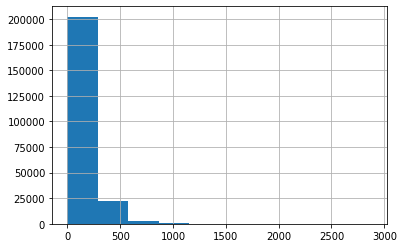

In [ ]:
df_twitch_vods['duration_minutes'].hist(bins=10)
plt.show()

In [ ]:
# Os IDs das bases de dados não são equivalentes portanto não poderão ser usados
df_igdb = df_igdb.drop('game_id',axis=1)
df_twitch_vods = df_twitch_vods .drop('game_id',axis=1)

In [ ]:
df_igdb.sort_values('game_name')

,game_name,genre_name
653903,!,Science fiction
653903,!,Point-and-click
653904,!,Puzzle
653905,!,Adventure
653906,!,Comedy
...,...,...
284747,黑暗料理,Indie
284746,黑暗料理,Strategy
538630,여우불,Indie
538628,여우불,Strategy


In [ ]:
df_igdb['game_name'].value_counts()

Retro World                                                     30
A Buttload of Free Games                                        29
SEGA Mega Drive & Genesis Classics                              28
Monopoly                                                        27
Jurassic Park                                                   26
                                                                ..
Stone it!                                                        1
Detectives United III: Timeless Voyage - Collector's Edition     1
Rainbow Pixel                                                    1
Ford Racing: Off Road                                            1
Alien: Blackout                                                  1
Name: game_name, Length: 147091, dtype: int64

In [ ]:
# Um exemplo de jogo do IGDB presente no DF da Twitch
df_twitch_vods[df_twitch_vods['game_name'] == 'Terraria']

,stream_id,game_name,user_name,published_at,duration,view_count,duration_minutes
13580,40381744057,Terraria,falta_de_calcio,2022-10-21T20:03:41Z,1h25m35s,0,85.583333
13581,40381630537,Terraria,uuaall,2022-10-21T19:36:46Z,48m28s,1,48.466667
13582,40381594537,Terraria,XLuanSX,2022-10-21T19:27:48Z,2h1m28s,0,121.466667
13583,40381519417,Terraria,Bonnie_Caracol,2022-10-21T19:08:54Z,2h20m22s,0,140.366667
13584,40381516025,Terraria,chatychallic3,2022-10-21T19:08:05Z,23m56s,0,23.933333
...,...,...,...,...,...,...,...
14175,41383003499,Terraria,RKS__,2022-10-13T00:04:22Z,2h8m32s,30,128.533333
14176,47294606525,Terraria,lutrixplayer,2022-10-12T23:26:57Z,3h1m28s,7,181.466667
14177,40340221945,Terraria,smylle_joga,2022-10-12T22:54:43Z,11m24s,3,11.400000
14178,40340219193,Terraria,latheuzin,2022-10-12T22:54:19Z,12m44s,2,12.733333


##Juntando os DFs e iniciando tratativas

In [ ]:
#Alguns nomes de jogos e usuários podem estar em cases diferentes mas serem repetidos
df_igdb['game_name'] = df_igdb['game_name'].str.lower()
df_twitch_vods['game_name'] = df_twitch_vods['game_name'].str.lower()

df_twitch_vods['user_name'] = df_twitch_vods['user_name'].str.lower()

In [ ]:
df_geral = pd.merge(df_igdb, df_twitch_vods, on=["game_name"])
display(df_geral.head(3))
display(df_geral.shape)

,game_name,genre_name,stream_id,user_name,published_at,duration,view_count,duration_minutes
0,mortal kombat x,Fighting,40382266521,xan_dee117,2022-10-21T21:51:49Z,26s,0,0.433333
1,mortal kombat x,Fighting,46200153644,eddy_gms,2022-10-20T01:08:03Z,28m9s,8,28.150000
2,mortal kombat x,Fighting,46194989036,eddy_gms,2022-10-19T00:32:43Z,1h7m36s,12,67.600000


(1043246, 8)

In [ ]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043246 entries, 0 to 1043245
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   game_name         1043246 non-null  object 
 1   genre_name        1043246 non-null  object 
 2   stream_id         1043246 non-null  int64  
 3   user_name         1043246 non-null  object 
 4   published_at      1043246 non-null  object 
 5   duration          1043246 non-null  object 
 6   view_count        1043246 non-null  int64  
 7   duration_minutes  1043246 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 71.6+ MB


In [ ]:
df_geral.describe()

,stream_id,view_count,duration_minutes
count,1.043246e+06,1.043246e+06,1.043246e+06
mean,4.133515e+10,1.766232e+02,1.439711e+02
std,2.329894e+09,2.842312e+03,1.518273e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.024610e+10,4.000000e+00,4.463333e+01
50%,4.034527e+10,1.500000e+01,1.125333e+02
75%,4.037913e+10,4.700000e+01,1.985333e+02
max,4.734265e+10,5.598750e+05,2.880083e+03


In [ ]:
# Convertendo as unidades de tempo
df_geral['duration'] = pd.to_timedelta(df_geral['duration'])
df_geral['published_at'] = pd.to_datetime(df_geral['published_at'])

In [ ]:
# Por definição de negócio vamos excluir as transmissões com menos de 30 minutos
df_geral = df_geral[df_geral['duration'] > '30m']

In [ ]:
#Separando o mês
df_geral['month'] = pd.DatetimeIndex(df_geral['published_at']).month

In [ ]:
# Os dados anteriores ao mês 8 são pouco representativos portanto serão removidos
df_geral['month'].value_counts()

10    502586
9     268235
8      66495
7        116
6        104
4         50
5         39
2         19
1         13
3         11
Name: month, dtype: int64

In [ ]:
df_geral = df_geral[df_geral['month'] > 7]

In [ ]:
df_geral['month'].value_counts()

10    502586
9     268235
8      66495
Name: month, dtype: int64

##Analisando Df final

In [ ]:
#######################
# Analisando Df final #
#######################

In [ ]:
df_geral

,game_name,genre_name,stream_id,user_name,published_at,duration,view_count,duration_minutes,month
2,mortal kombat x,Fighting,46194989036,eddy_gms,2022-10-19 00:32:43+00:00,0 days 01:07:36,12,67.600000,10
3,mortal kombat x,Fighting,40367348489,paladinodooeste,2022-10-18 22:30:55+00:00,0 days 01:28:50,9,88.833333,10
4,mortal kombat x,Fighting,40365410985,alankorrea,2022-10-18 14:31:32+00:00,0 days 01:00:35,20,60.583333,10
5,mortal kombat x,Fighting,47321828701,joga_gamingmais,2022-10-18 01:58:21+00:00,0 days 01:04:24,13,64.400000,10
6,mortal kombat x,Fighting,40363170121,paladinodooeste,2022-10-17 22:51:30+00:00,0 days 02:46:19,21,166.316667,10
...,...,...,...,...,...,...,...,...,...
1043241,identity v,Survival,40126538393,pepinomagico64,2022-08-26 22:19:54+00:00,0 days 00:53:20,427,53.333333,8
1043242,identity v,Survival,41167749083,lalunnaria,2022-08-25 22:43:38+00:00,0 days 02:10:21,35,130.350000,8
1043243,identity v,Survival,41161968043,lalunnaria,2022-08-24 22:44:28+00:00,0 days 02:51:37,34,171.616667,8
1043244,identity v,Survival,41157971227,lalunnaria,2022-08-23 23:21:59+00:00,0 days 01:49:28,15,109.466667,8


In [ ]:
analise(df_geral)


------[ HEAD ]--------



,game_name,genre_name,stream_id,user_name,published_at,duration,view_count,duration_minutes,month
2,mortal kombat x,Fighting,46194989036,eddy_gms,2022-10-19 00:32:43+00:00,0 days 01:07:36,12,67.600000,10
3,mortal kombat x,Fighting,40367348489,paladinodooeste,2022-10-18 22:30:55+00:00,0 days 01:28:50,9,88.833333,10



------[ SHAPE ]--------



(837316, 9)


------[ INFO ]--------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837316 entries, 2 to 1043245
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   game_name         837316 non-null  object             
 1   genre_name        837316 non-null  object             
 2   stream_id         837316 non-null  int64              
 3   user_name         837316 non-null  object             
 4   published_at      837316 non-null  datetime64[ns, UTC]
 5   duration          837316 non-null  timedelta64[ns]    
 6   view_count        837316 non-null  int64              
 7   duration_minutes  837316 non-null  float64            
 8   month             837316 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 63.9+ MB


None


------[ DESCRIBE ]--------

          stream_id                   duration     view_count  \
count  8.373160e+05                     837316  837316.000000   
mean   4.134203e+10  0 days 02:56:42.819369270     205.498965   
std    2.340311e+09  0 days 02:31:53.063411450    2776.518289   
min    3.959001e+10            0 days 00:30:01       0.000000   
25%    4.024135e+10            0 days 01:23:52       9.000000   
50%    4.034095e+10            0 days 02:20:37      22.000000   
75%    4.037779e+10            0 days 03:44:30      61.000000   
max    4.734252e+10            2 days 00:00:02  559875.000000   

       duration_minutes          month  
count     837316.000000  837316.000000  
mean         176.713656       9.520820  
std          151.884390       0.639059  
min           30.016667       8.000000  
25%           83.866667       9.000000  
50%          140.616667      10.000000  
75%          224.500000      10.000000  
max         2880.033333      10.000000  

----- [ Analisa

chess                  9246
crossfire              6464
tomb raider            6460
7 days to die          5522
god of war             5472
                       ... 
palmyra orphanage         1
chill                     1
simulator simulator       1
dj: decks & fx            1
stream games              1
Name: game_name, Length: 2068, dtype: int64

count     837316
unique      2068
top        chess
freq        9246
Name: game_name, dtype: object


----------------------

----- [ genre_name ] -----


Action                                            128870
Adventure                                          86170
Fantasy                                            59401
Shooter                                            54573
Role-playing (RPG)                                 53952
Open world                                         38217
Indie                                              37140
Simulator                                          35246
Strategy                                           32099
Survival                                           31918
Science fiction                                    28341
Horror                                             26553
Sandbox                                            18791
Warfare                                            16201
Hack and slash/Beat 'em up                         15688
Historical                                         15307
Platform                                           13895
Stealth                        

count     837316
unique        44
top       Action
freq      128870
Name: genre_name, dtype: object


----------------------

----- [ stream_id ] -----


40106326105    27
47120713645    27
40144571641    23
40177584969    23
40170395721    23
               ..
40287744729     1
40269247833     1
40259932121     1
40256885529     1
40352142649     1
Name: stream_id, Length: 162488, dtype: int64

count    8.373160e+05
mean     4.134203e+10
std      2.340311e+09
min      3.959001e+10
25%      4.024135e+10
50%      4.034095e+10
75%      4.037779e+10
max      4.734252e+10
Name: stream_id, dtype: float64


----------------------

----- [ user_name ] -----


aajusti             1564
manochess           1012
dudek_t              725
gmkrikor             713
robertojbmolina      667
                    ... 
gaolinda               1
samuraioldschool       1
apertaotab             1
nyhzumi                1
meegumih               1
Name: user_name, Length: 45025, dtype: int64

count      837316
unique      45025
top       aajusti
freq         1564
Name: user_name, dtype: object


----------------------

----- [ published_at ] -----


2022-10-20 00:29:21+00:00    102
2022-10-20 00:29:08+00:00     54
2022-10-20 21:04:13+00:00     49
2022-09-07 21:58:41+00:00     47
2022-10-20 00:29:07+00:00     39
                            ... 
2022-09-21 17:02:42+00:00      1
2022-09-21 17:19:40+00:00      1
2022-09-21 23:08:15+00:00      1
2022-09-22 18:03:35+00:00      1
2022-10-15 21:54:31+00:00      1
Name: published_at, Length: 155159, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                        837316
unique                       155159
top       2022-10-20 00:29:21+00:00
freq                            102
first     2022-08-03 11:32:04+00:00
last      2022-10-21 21:32:31+00:00
Name: published_at, dtype: object


----------------------

----- [ duration ] -----


0 days 02:04:10    270
0 days 02:02:30    258
0 days 02:26:20    254
0 days 02:01:50    254
0 days 03:01:00    240
                  ... 
0 days 07:32:00      1
0 days 06:38:36      1
0 days 09:41:08      1
0 days 08:46:33      1
0 days 07:26:36      1
Name: duration, Length: 26250, dtype: int64

count                       837316
mean     0 days 02:56:42.819369270
std      0 days 02:31:53.063411450
min                0 days 00:30:01
25%                0 days 01:23:52
50%                0 days 02:20:37
75%                0 days 03:44:30
max                2 days 00:00:02
Name: duration, dtype: object


----------------------

----- [ view_count ] -----


0        30670
5        23825
4        23489
3        22780
6        22408
         ...  
10276        1
4126         1
2416         1
8820         1
80632        1
Name: view_count, Length: 3884, dtype: int64

count    837316.000000
mean        205.498965
std        2776.518289
min           0.000000
25%           9.000000
50%          22.000000
75%          61.000000
max      559875.000000
Name: view_count, dtype: float64


----------------------

----- [ duration_minutes ] -----


124.166667    270
122.500000    258
146.333333    254
121.833333    254
181.000000    240
             ... 
452.000000      1
398.600000      1
581.133333      1
526.550000      1
446.600000      1
Name: duration_minutes, Length: 26250, dtype: int64

count    837316.000000
mean        176.713656
std         151.884390
min          30.016667
25%          83.866667
50%         140.616667
75%         224.500000
max        2880.033333
Name: duration_minutes, dtype: float64


----------------------

----- [ month ] -----


10    502586
9     268235
8      66495
Name: month, dtype: int64

count    837316.000000
mean          9.520820
std           0.639059
min           8.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: month, dtype: float64


----------------------


--------------


--------------


--------------



Criando subconsultas

In [ ]:
#############################
# DF de jogos para consulta #
#############################

df_games = df_igdb[['genre_name','game_name']]

# Cria Data Frame com jogos e quantidade de vezes que foi streamado
df_game_streams = df_geral.groupby('game_name')['stream_id'].count().to_frame()
df_game_streams.rename(columns={'stream_id' : 's'}, inplace=True)
df_game_streams = df_game_streams['s'].to_frame().reset_index()
df_game_streams.rename(columns={'s' : 'streams'}, inplace=True)

In [ ]:
# Filtrando usuario por genero
user_by_gen = (df_geral.groupby(['user_name'])['genre_name'].value_counts()).to_frame()
user_by_gen.rename(columns={'genre_name' : 'genere'}, inplace=True)
user_by_gen = user_by_gen['genere'].to_frame().reset_index()
user_by_gen.rename(columns={'genre' : 'freq'}, inplace=True)

In [ ]:
# Filtrando usuario por tempo de transmissão
user_by_time = (df_geral.drop_duplicates(subset='published_at').groupby(['user_name'])['duration'].sum()).to_frame()
user_by_time.rename(columns={'duration' : 'dur'}, inplace=True)
user_by_time = user_by_time['dur'].to_frame().reset_index()
user_by_time.rename(columns={'dur' : 'duration'}, inplace=True)

In [ ]:
# Agrupamento de usuario por genero e tempo total de transmissão
user_by_gen_time = (df_geral.drop_duplicates(subset='published_at').groupby(['user_name','genre_name'])['duration'].sum()).to_frame()
user_by_gen_time.rename(columns={'duration' : 'dur'}, inplace=True)
user_by_gen_time = user_by_gen_time['dur'].to_frame().reset_index()
user_by_gen_time.rename(columns={'dur' : 'duration'}, inplace=True)

In [ ]:
df_geral.head(2)

,game_name,genre_name,stream_id,user_name,published_at,duration,view_count,duration_minutes,month
2,mortal kombat x,Fighting,46194989036,eddy_gms,2022-10-19 00:32:43+00:00,0 days 01:07:36,12,67.600000,10
3,mortal kombat x,Fighting,40367348489,paladinodooeste,2022-10-18 22:30:55+00:00,0 days 01:28:50,9,88.833333,10


In [ ]:
#
# Perguntas de negócio
#

In [ ]:
# Quantos streamers temos no total?
len(df_geral['user_name'].unique())

45025

In [ ]:
#Quantos jogos cada streamer joga, em média?
df_geral.groupby('user_name')['game_name'].count().sort_values(ascending=False).head(15)

user_name
aajusti             1564
manochess           1012
dudek_t              725
gmkrikor             713
robertojbmolina      667
tradersmerchants     623
xilonha              602
wellcomes            592
espadaence           580
queenofpatif         577
subnormalhunter      572
marcobc              564
ligamagic            560
ttvpaulomonpean      553
fgnerlima            552
Name: game_name, dtype: int64

In [ ]:
#Média por mês
(df_geral.groupby(['user_name','month'])['game_name'].count()/12).sort_values(ascending=False).head(15)

user_name         month
aajusti           9        63.250000
                  10       55.583333
manochess         9        53.666667
riveralegend      10       39.000000
jonyzeraaaa       10       37.333333
dudek_t           9        35.083333
robertojbmolina   9        34.500000
gmkrikor          9        32.583333
belinera1         10       31.500000
ligamagic         10       30.666667
monteiro1fps      10       30.666667
subnormalhunter   9        30.166667
yrochi_tv         9        29.333333
marcobc           10       27.333333
tradersmerchants  9        27.166667
Name: game_name, dtype: float64

In [ ]:
# Quantas categorias temos no total?
len(df_geral['genre_name'].unique())

44

In [ ]:
#Quais são as categorias mais jogadas? E menos jogadas?
df_geral.groupby('genre_name')['stream_id'].count().sort_values(ascending=False)

genre_name
Action                                            128870
Adventure                                          86170
Fantasy                                            59401
Shooter                                            54573
Role-playing (RPG)                                 53952
Open world                                         38217
Indie                                              37140
Simulator                                          35246
Strategy                                           32099
Survival                                           31918
Science fiction                                    28341
Horror                                             26553
Sandbox                                            18791
Warfare                                            16201
Hack and slash/Beat 'em up                         15688
Historical                                         15307
Platform                                           13895
Stealth             

In [ ]:
(df_geral.groupby('genre_name')['duration_minutes'].sum()/60).sort_values(ascending=False)

genre_name
Action                                            368824.774722
Adventure                                         259235.519444
Fantasy                                           185964.755556
Role-playing (RPG)                                174820.327778
Shooter                                           148806.889167
Indie                                             111956.092778
Open world                                        111225.118333
Simulator                                         105572.852778
Survival                                           98445.713611
Strategy                                           97254.261944
Science fiction                                    80532.501389
Horror                                             76224.054444
Sandbox                                            57903.835556
Hack and slash/Beat 'em up                         48400.394167
Historical                                         45602.669167
Warfare                      

In [ ]:
df_geral.groupby('genre_name')['view_count'].sum().sort_values(ascending=False)

genre_name
Action                                            24258181
Fantasy                                           15724134
Adventure                                         14479406
Strategy                                          11333054
Role-playing (RPG)                                10711373
Simulator                                          8798045
Shooter                                            7623388
Indie                                              6330758
Card & Board Game                                  6261590
Survival                                           5160703
Open world                                         4891251
Turn-based strategy (TBS)                          4772628
Science fiction                                    4747978
Sport                                              4520117
Platform                                           4206902
Horror                                             3807718
Sandbox                                      

In [ ]:
# Avaliando as transmissões

In [ ]:
df_geral['duration_minutes'].describe(percentiles=[.25,.50,.75,.95,.99])

count    837316.000000
mean        176.713656
std         151.884390
min          30.016667
25%          83.866667
50%         140.616667
75%         224.500000
95%         425.866667
99%         671.959167
max        2880.033333
Name: duration_minutes, dtype: float64

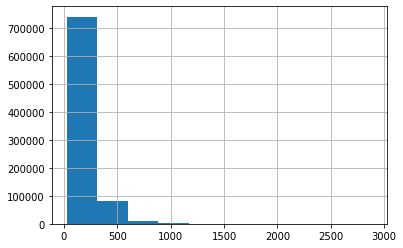

In [ ]:
df_geral['duration_minutes'].hist()

In [ ]:
# As trasmissões ou as visualizações aumentaram com o passar do tempo?

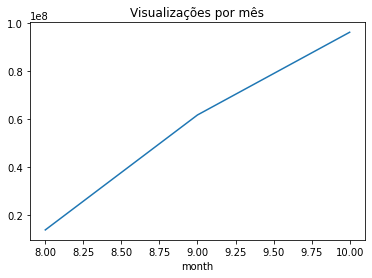

In [ ]:
df_geral.groupby('month')['view_count'].sum().plot(title="Visualizações por mês")

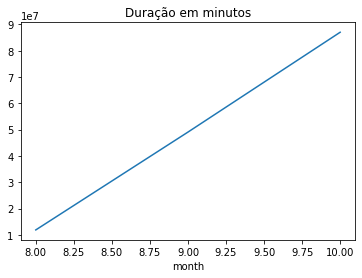

In [ ]:
df_geral.groupby('month')['duration_minutes'].sum().plot(title="Duração em minutos")

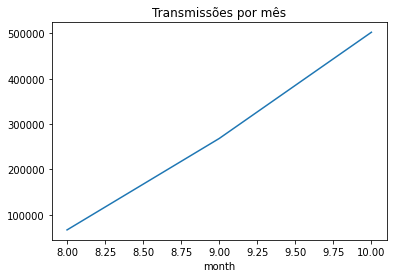

In [ ]:
df_geral.groupby('month')['stream_id'].count().plot(title="Transmissões por mês")

In [ ]:
df_geral.groupby('month')['stream_id'].count().sort_index()

month
8      66495
9     268235
10    502586
Name: stream_id, dtype: int64

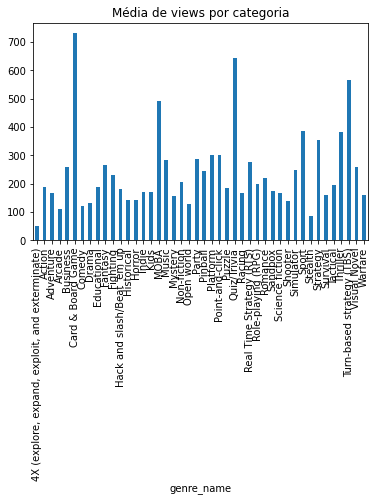

In [ ]:
df_geral.groupby('genre_name')['view_count'].mean().plot(title='Média de views por categoria',kind='bar')

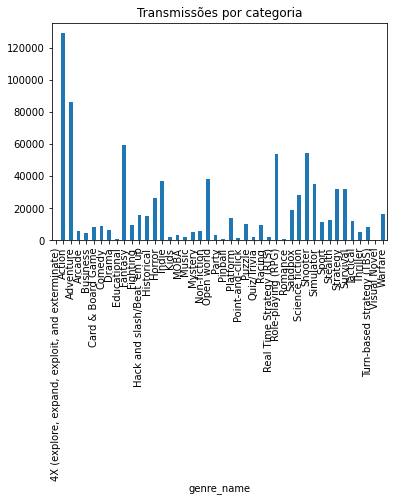

In [ ]:
df_geral.groupby('genre_name')['stream_id'].count().plot(title='Transmissões por categoria',kind='bar')

In [ ]:
# Avaliando os streamers

In [ ]:
# Usuarios com maior tempo de transmissão
user_by_time.sort_values('duration',ascending=False).head(15)

,user_name,duration
36131,speed_gunner1,46 days 14:06:26
30455,periclesre5br,34 days 22:49:16
9800,dudek_t,23 days 15:51:11
28933,oldsann,22 days 16:27:48
7885,dark_madden,21 days 08:45:59
8103,davithatch,21 days 08:17:34
17916,jimmydr,19 days 22:20:57
41019,w3lth,18 days 16:13:19
12256,fishnothing,18 days 03:52:46
30797,pirajuu,16 days 04:31:35


In [ ]:
# Média de views por streamer
df_geral.groupby('user_name')['view_count'].mean().sort_values(ascending=False).head(15)

user_name
casimito                263661.500000
gaules                  165587.814815
yoda                    150815.000000
twitchrivals_pt          93774.000000
nahzinhaa                89828.000000
tioorochitwitch          88677.000000
skipnho                  67645.000000
dota2ti_pt               60899.666667
speedgamingportugues     49551.097276
btsbrasilesportes        48708.250000
oestagiario              47100.750000
zorlakoka                47033.000000
wuant                    43632.000000
ns_art                   42621.333333
patriota                 37332.000000
Name: view_count, dtype: float64

In [ ]:
df_geral.groupby('user_name')['view_count'].sum().sort_values(ascending=False).head(15)

user_name
speedgamingportugues    12734632
gaules                   4470871
gmkrikor                 3877317
ligamagic                3312344
chesscompt               2351359
aajusti                  2241626
ale_apoka                2117250
casimito                 2109292
fishnothing              2092194
filiperaaamos            1724415
worldofwarships          1548323
brunoclash               1392115
migueltcgbreaks          1222700
ness                     1202240
btsbrasilesportes         974165
Name: view_count, dtype: int64

In [ ]:
# Usuarios com mais transmissão
df_geral.groupby('user_name')['stream_id'].count().sort_values(ascending=False).head(15)

user_name
aajusti             1564
manochess           1012
dudek_t              725
gmkrikor             713
robertojbmolina      667
tradersmerchants     623
xilonha              602
wellcomes            592
espadaence           580
queenofpatif         577
subnormalhunter      572
marcobc              564
ligamagic            560
ttvpaulomonpean      553
fgnerlima            552
Name: stream_id, dtype: int64

In [ ]:
# Jogos distintos

df_geral['game_name'].drop_duplicates().count()

2068

In [ ]:
#Jogos com mais transmissões
df_geral.groupby('game_name')['genre_name'].value_counts().sort_values(ascending=False).head(15)

game_name                 genre_name        
chess                     Card & Board Game     2814
                          Strategy              2412
crossfire                 Shooter               2020
chess                     Simulator             1608
tomb raider               Adventure             1360
crossfire                 Arcade                1212
                          Action                1212
tomb raider               Platform              1020
                          Action                1020
final fantasy xiv online  Fantasy               1016
                          Role-playing (RPG)    1016
magic: the gathering      Strategy               964
                          Fantasy                964
                          Card & Board Game      964
god of war                Adventure              912
Name: genre_name, dtype: int64

In [ ]:
#Jogos com mais horas de transmissão
df_geral.groupby('game_name')['duration'].sum().sort_values(ascending=False).head(15)

game_name
chess                   1093 days 07:17:17
7 days to die            861 days 13:27:06
tomb raider              806 days 16:48:17
mu online                766 days 01:53:20
the isle                 722 days 23:20:53
ark: survival evolved    660 days 00:01:30
crossfire                657 days 07:52:16
escape from tarkov       622 days 16:22:00
black desert             615 days 23:24:56
conan exiles             614 days 18:40:24
no man's sky             613 days 20:55:39
terraria                 607 days 06:11:36
path of exile            596 days 13:51:30
project zomboid          541 days 08:19:15
rust                     535 days 07:17:54
Name: duration, dtype: timedelta64[ns]

In [ ]:
#Existe correlação entre as variáveis?
df_geral[['month','view_count','duration_minutes','genre_name']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,month,view_count,duration_minutes,genre_name
month,1.000000,0.029080,0.009968,-0.027359
view_count,0.029080,1.000000,0.134743,0.005912
duration_minutes,0.009968,0.134743,1.000000,0.002266
genre_name,-0.027359,0.005912,0.002266,1.000000


In [ ]:
teste = df_geral.groupby('genre_name')['month'].value_counts().to_frame()
teste.rename(columns={'month' : 'm'}, inplace=True)
teste = teste['m'].to_frame().reset_index()
teste.rename(columns={'m' : 'q'}, inplace=True)
teste

,genre_name,month,q
0,"4X (explore, expand, exploit, and exterminate)",10,193
1,"4X (explore, expand, exploit, and exterminate)",9,158
2,"4X (explore, expand, exploit, and exterminate)",8,71
3,Action,10,79102
4,Action,9,39851
...,...,...,...
127,Visual Novel,10,171
128,Visual Novel,8,53
129,Warfare,10,11310
130,Warfare,9,3870


##Realizando pequenas consultas

In [ ]:
#################################
# Realizando pequenas consultas #
#################################

In [ ]:
# Quanto tempo o Gaules transmitiu esse ano
user_by_time[user_by_time['user_name'] == 'gaules']

,user_name,duration
13618,gaules,1 days 17:14:05


In [ ]:
# Quais foram as trasmissões do Gaules
user_by_gen[user_by_gen['user_name'] == 'gaules']

,user_name,genre_name,genere
88494,gaules,Action,4
88495,gaules,Indie,3
88496,gaules,Simulator,3
88497,gaules,Sport,2
88498,gaules,Adventure,1
88499,gaules,Drama,1
88500,gaules,Horror,1
88501,gaules,Mystery,1
88502,gaules,Open world,1
88503,gaules,Puzzle,1


In [ ]:
# Quais generos o Gaules mais transmitiu esse ano
user_by_gen_time[user_by_gen_time['user_name'] == 'gaules'].sort_values('duration', ascending=False)

,user_name,genre_name,duration
18607,gaules,Role-playing (RPG),0 days 20:06:42
18605,gaules,Puzzle,0 days 10:26:54
18608,gaules,Shooter,0 days 07:33:51
18606,gaules,Racing,0 days 02:03:48
18609,gaules,Simulator,0 days 01:02:50


In [ ]:
# Quem tem mais transmissões do tipo RPG
user_by_gen[user_by_gen['genre_name'] == 'Role-playing (RPG)'].sort_values('genere',ascending=False).head(10)

,user_name,genre_name,genere
2422,a121daan,Role-playing (RPG),86
116362,jimmydr,Role-playing (RPG),74
100359,heigberg,Role-playing (RPG),72
256360,tradersmerchants,Role-playing (RPG),68
274915,xduracel,Role-playing (RPG),68
60016,dofusaocubo,Role-playing (RPG),67
159103,marcobc,Role-playing (RPG),66
210419,ragamertv,Role-playing (RPG),66
63922,dudek_t,Role-playing (RPG),65
240873,subnormalhunter,Role-playing (RPG),63


In [ ]:
# Quem tem mais horas de RPG
user_by_gen_time[user_by_gen_time['genre_name'] == 'Role-playing (RPG)'].sort_values('duration', ascending=False).head(10)

,user_name,genre_name,duration
24429,jimmydr,Role-playing (RPG),19 days 13:50:25
16741,fishnothing,Role-playing (RPG),18 days 03:52:46
12590,dofusaocubo,Role-playing (RPG),15 days 17:00:30
10475,danielkarioka,Role-playing (RPG),15 days 07:51:39
35290,miiza,Role-playing (RPG),14 days 15:10:45
32061,luveira,Role-playing (RPG),13 days 20:38:36
57724,xduracel,Role-playing (RPG),13 days 07:47:40
46715,ryudo_phoenix,Role-playing (RPG),12 days 04:37:06
18030,gabusensei,Role-playing (RPG),12 days 03:03:32
37608,neev1s,Role-playing (RPG),11 days 08:53:40


In [ ]:
# Consultando quantas hora qual usuario estrimou um determinado jogo
df_geral[df_geral['game_name'] == 'the last of us part ii'].groupby(['user_name'])['duration'].sum()

user_name
1macedin      0 days 22:28:00
44mp          0 days 06:03:54
aavobr        1 days 23:23:24
abunho        1 days 08:10:24
akatniss      1 days 19:46:06
                    ...      
xp_gameplay   1 days 02:04:00
xpl0w3r       0 days 07:30:18
zbradmats2    1 days 22:37:30
zhypeviktor   0 days 03:09:54
ファンファ         2 days 01:27:06
Name: duration, Length: 170, dtype: timedelta64[ns]

# Recomendação

In [ ]:
# Testando

In [ ]:
# Dumificando o df de games
df_games_dum = pd.get_dummies(df_games,columns=['genre_name'])
df_games_dum

,game_name,"genre_name_4X (explore, expand, exploit, and exterminate)",genre_name_Action,genre_name_Adventure,genre_name_Arcade,genre_name_Business,genre_name_Card & Board Game,genre_name_Comedy,genre_name_Drama,genre_name_Educational,...,genre_name_Simulator,genre_name_Sport,genre_name_Stealth,genre_name_Strategy,genre_name_Survival,genre_name_Tactical,genre_name_Thriller,genre_name_Turn-based strategy (TBS),genre_name_Visual Novel,genre_name_Warfare
0,dogou souken,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,city mysteries,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sword of the black stone,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sword of the black stone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,otterbash,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749058,the last of us part ii,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
749060,this is the police,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
749092,lego the incredibles,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
749112,lego the incredibles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Esta parte do códico apenas escolhe os TOP streamers baseados em alguns critérios para alguns testes
# Não irá para produção!!!

In [ ]:
# Escolhendo os top streamers

#streamers com mais horas
lista_top_streamers = []
lista_top_streamers.extend(user_by_time.sort_values('duration',ascending=False).head(15)['user_name'].to_list())
#streamers com mais transmissões
lista_top_streamers.extend(list(df_geral.groupby('user_name')['stream_id'].count().sort_values(ascending=False).head(15).keys()))
#Streamers com maior média de views
lista_top_streamers.extend(list(df_geral.groupby('user_name')['view_count'].mean().sort_values(ascending=False).head(15).keys()))
lista_top_streamers = list(set(lista_top_streamers))

In [ ]:
# Dos Top streamers quais tem transmissões em mais de 2 categorias
lista_streames_tipo = []
for a in lista_top_streamers:
  if len(df_geral[df_geral['user_name'] == a]['genre_name'].value_counts().keys()) > 2:
    lista_streames_tipo.append(a)
print(lista_streames_tipo) 

['speed_gunner1', 'robertojbmolina', 'dark_madden', 'twitchrivals_pt', 'zorlakoka', 'w3lth', 'ttvpaulomonpean', 'btsbrasilesportes', 'wellcomes', 'pirajuu', 'dudek_t', 'nahzinhaa', 'dota2ti_pt', 'miiza', 'manochess', 'mr_driv3r', 'xilonha', 'ligamagic', 'yoda', 'dofusaocubo', 'espadaence', 'gmkrikor', 'speedgamingportugues', 'tradersmerchants', 'davithatch', 'subnormalhunter', 'jimmydr', 'ns_art', 'fishnothing', 'oldsann', 'danielkarioka', 'periclesre5br', 'patriota', 'gaules', 'skipnho', 'marcobc', 'queenofpatif', 'aajusti', 'tioorochitwitch', 'fgnerlima', 'wuant']


In [ ]:
# Avaliando cada top streamer com transmissões em mais de 1 categoria
for a in lista_streames_tipo:
  avalia_streamer(str(a))
  print()
  print()
  print("--------------------")
  print()
  print()

Streamer :  speed_gunner1

[ Total de transmissões por gênero ]


Platform                      46
Hack and slash/Beat 'em up    46
Adventure                     46
Action                        46
Fantasy                       46
Historical                    46
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


god of war ii    276
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


god of war ii    1
Name: game_name, dtype: int64


[ Generos únicos ]


Platform    1
Name: genre_name, dtype: int64



--------------------


Streamer :  robertojbmolina

[ Total de transmissões por gênero ]


Card & Board Game            203
Strategy                     174
Simulator                    116
Quiz/Trivia                   58
Sport                         29
Indie                         29
Turn-based strategy (TBS)     29
Action                        29
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


chess    667
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


chess    1
Name: game_name, dtype: int64


[ Generos únicos ]


Simulator    1
Name: genre_name, dtype: int64



--------------------


Streamer :  dark_madden

[ Total de transmissões por gênero ]


Racing             33
Simulator          33
Sandbox            33
Tactical           29
Warfare            29
Action              3
Platform            2
Music               1
Sport               1
Indie               1
Science fiction     1
Party               1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


marbles on stream    99
stream raiders       58
beat saber            6
nothing               4
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


stream raiders       1
nothing              1
marbles on stream    1
beat saber           1
Name: game_name, dtype: int64


[ Generos únicos ]


Tactical    1
Platform    1
Racing      1
Music       1
Name: genre_name, dtype: int64



--------------------


Streamer :  twitchrivals_pt

[ Total de transmissões por gênero ]


Music              1
Sport              1
Indie              1
Action             1
Science fiction    1
Party              1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


beat saber    6
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


beat saber    1
Name: game_name, dtype: int64


[ Generos únicos ]


Music    1
Name: genre_name, dtype: int64



--------------------


Streamer :  zorlakoka

[ Total de transmissões por gênero ]


Role-playing (RPG)    1
Adventure             1
Action                1
Fantasy               1
Open world            1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


world of warcraft    5
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


world of warcraft    1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    1
Name: genre_name, dtype: int64



--------------------


Streamer :  w3lth

[ Total de transmissões por gênero ]


Shooter     51
Action      51
Survival    39
Party       39
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


sausage man            156
apex legends mobile     24
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


sausage man            1
apex legends mobile    1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter    2
Name: genre_name, dtype: int64



--------------------


Streamer :  ttvpaulomonpean

[ Total de transmissões por gênero ]


Shooter                     79
Real Time Strategy (RTS)    79
Simulator                   79
Tactical                    79
Action                      79
Historical                  79
Warfare                     79
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


world of warships    553
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


world of warships    1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter    1
Name: genre_name, dtype: int64



--------------------


Streamer :  btsbrasilesportes

[ Total de transmissões por gênero ]


Strategy    4
MOBA        4
Action      4
Fantasy     4
Warfare     4
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


dota 2    20
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


dota 2    1
Name: game_name, dtype: int64


[ Generos únicos ]


Strategy    1
Name: genre_name, dtype: int64



--------------------


Streamer :  wellcomes

[ Total de transmissões por gênero ]


Action                        70
Adventure                     70
Role-playing (RPG)            60
Fantasy                       59
Mystery                       49
Fighting                      48
Science fiction               47
Hack and slash/Beat 'em up    47
Strategy                      47
Simulator                     47
Open world                    12
Shooter                       11
Survival                      11
Horror                         8
Historical                     2
Platform                       1
Stealth                        1
Kids                           1
Music                          1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


honkai impact 3rd               470
the witcher 3: wild hunt         45
resident evil 6                  15
resident evil: revelations 2     15
shadow of the tomb raider        12
tower of fantasy                 10
grand chase                       8
rise of the tomb raider           6
resident evil: revelations        5
resident evil 5                   5
clone hero                        1
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


resident evil: revelations      1
shadow of the tomb raider       1
rise of the tomb raider         1
resident evil 6                 1
clone hero                      1
grand chase                     1
resident evil 5                 1
tower of fantasy                1
the witcher 3: wild hunt        1
honkai impact 3rd               1
resident evil: revelations 2    1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter               6
Fighting              2
Role-playing (RPG)    2
Music                 1
Name: genre_name, dtype: int64



--------------------


Streamer :  pirajuu

[ Total de transmissões por gênero ]


Shooter               59
Action                59
Survival              59
Science fiction       54
Drama                 54
Role-playing (RPG)     5
Warfare                5
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


the cycle: frontier    270
super people            25
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


the cycle: frontier    1
super people           1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter    2
Name: genre_name, dtype: int64



--------------------


Streamer :  dudek_t

[ Total de transmissões por gênero ]


Indie                 67
Open world            65
Role-playing (RPG)    65
Simulator             65
Adventure             65
Survival              65
Action                62
Strategy              61
Horror                61
Shooter               60
Fighting              59
Science fiction        7
Educational            6
Sandbox                6
Puzzle                 3
Tactical               2
Thriller               2
Sport                  1
Party                  1
Quiz/Trivia            1
Fantasy                1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


the isle          649
path of titans     54
phasmophobia       12
gartic              5
paladins            5
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


gartic            1
the isle          1
path of titans    1
paladins          1
phasmophobia      1
Name: game_name, dtype: int64


[ Generos únicos ]


Puzzle                2
Fighting              1
Role-playing (RPG)    1
Shooter               1
Name: genre_name, dtype: int64



--------------------


Streamer :  nahzinhaa

[ Total de transmissões por gênero ]


Platform           1
Adventure          1
Action             1
Fantasy            1
Science fiction    1
Historical         1
Stealth            1
Sandbox            1
Open world         1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


assassin's creed    9
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


assassin's creed    1
Name: game_name, dtype: int64


[ Generos únicos ]


Platform    1
Name: genre_name, dtype: int64



--------------------


Streamer :  dota2ti_pt

[ Total de transmissões por gênero ]


Strategy    3
MOBA        3
Action      3
Fantasy     3
Warfare     3
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


dota 2    15
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


dota 2    1
Name: game_name, dtype: int64


[ Generos únicos ]


Strategy    1
Name: genre_name, dtype: int64



--------------------


Streamer :  miiza

[ Total de transmissões por gênero ]


Role-playing (RPG)           41
Fantasy                      41
Turn-based strategy (TBS)    38
Kids                         38
Indie                         5
Adventure                     4
Action                        4
Horror                        4
Racing                        1
Simulator                     1
Business                      1
Non-fiction                   1
Open world                    1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


pokémon community game      152
there is no light            18
american truck simulator      6
the fridge is red             4
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


american truck simulator    1
pokémon community game      1
the fridge is red           1
there is no light           1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    2
Racing                1
Adventure             1
Name: genre_name, dtype: int64



--------------------


Streamer :  manochess

[ Total de transmissões por gênero ]


Card & Board Game            308
Strategy                     264
Simulator                    176
Quiz/Trivia                   88
Sport                         44
Indie                         44
Turn-based strategy (TBS)     44
Action                        44
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


chess    1012
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


chess    1
Name: game_name, dtype: int64


[ Generos únicos ]


Simulator    1
Name: genre_name, dtype: int64



--------------------


Streamer :  mr_driv3r

[ Total de transmissões por gênero ]


Simulator     49
Racing        47
Strategy      46
Business      46
Sport         44
Indie          3
Sandbox        2
Open world     2
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


f1 manager 2022                220
construction simulator          10
car mechanic simulator 2021      9
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


f1 manager 2022                1
car mechanic simulator 2021    1
construction simulator         1
Name: game_name, dtype: int64


[ Generos únicos ]


Racing       2
Simulator    1
Name: genre_name, dtype: int64



--------------------


Streamer :  xilonha

[ Total de transmissões por gênero ]


Simulator                    86
Strategy                     86
Turn-based strategy (TBS)    86
Adventure                    86
Action                       86
Fantasy                      86
Open world                   86
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


pokémon go    602
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


pokémon go    1
Name: game_name, dtype: int64


[ Generos únicos ]


Simulator    1
Name: genre_name, dtype: int64



--------------------


Streamer :  ligamagic

[ Total de transmissões por gênero ]


Strategy                     140
Card & Board Game            140
Fantasy                      140
Turn-based strategy (TBS)     70
Tactical                      70
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


magic: the gathering    560
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


magic: the gathering    1
Name: game_name, dtype: int64


[ Generos únicos ]


Strategy    1
Name: genre_name, dtype: int64



--------------------


Streamer :  yoda

[ Total de transmissões por gênero ]


Role-playing (RPG)    1
Adventure             1
Indie                 1
Action                1
Survival              1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


last oasis    5
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


last oasis    1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    1
Name: genre_name, dtype: int64



--------------------


Streamer :  dofusaocubo

[ Total de transmissões por gênero ]


Role-playing (RPG)           67
Strategy                     67
Turn-based strategy (TBS)    67
Adventure                    67
Fantasy                      67
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


dofus    335
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


dofus    1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    1
Name: genre_name, dtype: int64



--------------------


Streamer :  espadaence

[ Total de transmissões por gênero ]


Fighting                      58
Role-playing (RPG)            58
Simulator                     58
Strategy                      58
Hack and slash/Beat 'em up    58
Adventure                     58
Action                        58
Fantasy                       58
Science fiction               58
Mystery                       58
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


honkai impact 3rd    580
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


honkai impact 3rd    1
Name: game_name, dtype: int64


[ Generos únicos ]


Fighting    1
Name: genre_name, dtype: int64



--------------------


Streamer :  gmkrikor

[ Total de transmissões por gênero ]


Card & Board Game            217
Strategy                     186
Simulator                    124
Quiz/Trivia                   62
Sport                         31
Indie                         31
Turn-based strategy (TBS)     31
Action                        31
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


chess    713
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


chess    1
Name: game_name, dtype: int64


[ Generos únicos ]


Simulator    1
Name: genre_name, dtype: int64



--------------------


Streamer :  speedgamingportugues

[ Total de transmissões por gênero ]


Action                67
Platform              58
Adventure             43
Fantasy               27
Shooter               18
Science fiction       14
Thriller              14
Role-playing (RPG)     5
Puzzle                 4
Horror                 4
Survival               2
Open world             1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


super mario world                          132
super metroid                               84
the legend of zelda: a link to the past     20
resident evil 2                             16
final fantasy v                              5
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


super metroid                              1
final fantasy v                            1
super mario world                          1
the legend of zelda: a link to the past    1
resident evil 2                            1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter               2
Role-playing (RPG)    1
Platform              1
Puzzle                1
Name: genre_name, dtype: int64



--------------------


Streamer :  tradersmerchants

[ Total de transmissões por gênero ]


Simulator                                         79
Adventure                                         77
Indie                                             74
Action                                            71
Role-playing (RPG)                                68
Shooter                                           67
Science fiction                                   59
Warfare                                           56
Survival                                          16
Open world                                        14
Fighting                                          12
Strategy                                          12
Horror                                            11
Fantasy                                            3
Sandbox                                            2
Non-fiction                                        1
4X (explore, expand, exploit, and exterminate)     1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


star citizen                    448
the isle                         99
conan exiles                     24
empyrion - galactic survival     20
beasts of bermuda                15
stranded deep                    10
x4: foundations                   5
microsoft flight simulator        2
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


the isle                        1
x4: foundations                 1
microsoft flight simulator      1
star citizen                    1
beasts of bermuda               1
empyrion - galactic survival    1
conan exiles                    1
stranded deep                   1
Name: game_name, dtype: int64


[ Generos únicos ]


Simulator    4
Fighting     2
Shooter      2
Name: genre_name, dtype: int64



--------------------


Streamer :  davithatch

[ Total de transmissões por gênero ]


Shooter                     42
Action                      42
Survival                    42
Drama                       40
Science fiction             40
Strategy                     3
Adventure                    2
Open world                   2
Sandbox                      2
Fantasy                      2
Indie                        2
Tactical                     2
Simulator                    2
Role-playing (RPG)           2
Warfare                      1
Historical                   1
Real Time Strategy (RTS)     1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


the cycle: frontier    200
my time at portia       16
lost light               8
age of empires iv        4
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


age of empires iv      1
the cycle: frontier    1
my time at portia      1
lost light             1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter                     2
Real Time Strategy (RTS)    1
Role-playing (RPG)          1
Name: genre_name, dtype: int64



--------------------


Streamer :  subnormalhunter

[ Total de transmissões por gênero ]


Action                71
Adventure             69
Role-playing (RPG)    63
Indie                 45
Sandbox               44
Survival              43
Open world            43
Simulator             43
Shooter               32
Horror                31
Strategy              31
Science fiction       21
Fantasy               18
Puzzle                 7
Comedy                 7
Tactical               1
Stealth                1
Platform               1
Sport                  1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


7 days to die                         341
no man's sky                          108
tales of arise                         72
lego star wars: the skywalker saga     35
starbound                               7
payday 2                                5
rocket league                           4
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


no man's sky                          1
tales of arise                        1
7 days to die                         1
payday 2                              1
starbound                             1
rocket league                         1
lego star wars: the skywalker saga    1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    2
Shooter               2
Platform              1
Sport                 1
Puzzle                1
Name: genre_name, dtype: int64



--------------------


Streamer :  jimmydr

[ Total de transmissões por gênero ]


Fantasy               76
Role-playing (RPG)    74
Adventure             74
Puzzle                 2
Action                 2
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


big time    222
crypto        6
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


crypto      1
big time    1
Name: game_name, dtype: int64


[ Generos únicos ]


Puzzle                1
Role-playing (RPG)    1
Name: genre_name, dtype: int64



--------------------


Streamer :  ns_art

[ Total de transmissões por gênero ]


Strategy    3
MOBA        3
Action      3
Fantasy     3
Warfare     3
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


dota 2    15
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


dota 2    1
Name: game_name, dtype: int64


[ Generos únicos ]


Strategy    1
Name: genre_name, dtype: int64



--------------------


Streamer :  fishnothing

[ Total de transmissões por gênero ]


Role-playing (RPG)            35
Hack and slash/Beat 'em up    35
Adventure                     35
Action                        35
Fantasy                       35
Survival                      35
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


monster hunter rise    210
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


monster hunter rise    1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    1
Name: genre_name, dtype: int64



--------------------


Streamer :  oldsann

[ Total de transmissões por gênero ]


Racing       30
Simulator    30
Sandbox      30
Shooter       1
Tactical      1
Action        1
Warfare       1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


marbles on stream                   90
counter-strike: global offensive     4
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


marbles on stream                   1
counter-strike: global offensive    1
Name: game_name, dtype: int64


[ Generos únicos ]


Racing     1
Shooter    1
Name: genre_name, dtype: int64



--------------------


Streamer :  danielkarioka

[ Total de transmissões por gênero ]


Role-playing (RPG)           52
Turn-based strategy (TBS)    50
Fantasy                      50
Shooter                       2
Adventure                     2
Action                        2
Science fiction               2
Drama                         2
Open world                    2
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


summoners war: sky arena    150
horizon zero dawn            14
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


summoners war: sky arena    1
horizon zero dawn           1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    1
Shooter               1
Name: genre_name, dtype: int64



--------------------


Streamer :  periclesre5br

[ Total de transmissões por gênero ]


Hack and slash/Beat 'em up    22
Adventure                     22
Action                        22
Fantasy                       22
Historical                    22
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


god of war iii    110
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


god of war iii    1
Name: game_name, dtype: int64


[ Generos únicos ]


Hack and slash/Beat 'em up    1
Name: genre_name, dtype: int64



--------------------


Streamer :  patriota

[ Total de transmissões por gênero ]


Shooter    1
Action     1
Stealth    1
Warfare    1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


call of duty: modern warfare 2    4
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


call of duty: modern warfare 2    1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter    1
Name: genre_name, dtype: int64



--------------------


Streamer :  gaules

[ Total de transmissões por gênero ]


Action                4
Simulator             3
Indie                 3
Sport                 2
Puzzle                1
Open world            1
Sandbox               1
Survival              1
Horror                1
Role-playing (RPG)    1
Warfare               1
Adventure             1
Tactical              1
Shooter               1
Mystery               1
Drama                 1
Thriller              1
Science fiction       1
Racing                1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


detroit: become human               7
project zomboid                     7
wreckfest                           5
counter-strike: global offensive    4
golf it!                            4
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


detroit: become human               1
counter-strike: global offensive    1
golf it!                            1
project zomboid                     1
wreckfest                           1
Name: game_name, dtype: int64


[ Generos únicos ]


Puzzle                1
Shooter               1
Simulator             1
Role-playing (RPG)    1
Racing                1
Name: genre_name, dtype: int64



--------------------


Streamer :  skipnho

[ Total de transmissões por gênero ]


Role-playing (RPG)            2
Hack and slash/Beat 'em up    2
Adventure                     2
Action                        2
Fantasy                       2
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


lost ark    10
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


lost ark    1
Name: game_name, dtype: int64


[ Generos únicos ]


Role-playing (RPG)    1
Name: genre_name, dtype: int64



--------------------


Streamer :  marcobc

[ Total de transmissões por gênero ]


Role-playing (RPG)    66
Simulator             66
Adventure             66
Action                66
Survival              66
Open world            66
Fighting              54
Fantasy               54
Shooter               12
Strategy              12
Indie                 12
Horror                12
Sandbox               12
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


conan exiles     432
7 days to die    132
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


7 days to die    1
conan exiles     1
Name: game_name, dtype: int64


[ Generos únicos ]


Shooter     1
Fighting    1
Name: genre_name, dtype: int64



--------------------


Streamer :  queenofpatif

[ Total de transmissões por gênero ]


Card & Board Game            175
Strategy                     150
Simulator                    100
Quiz/Trivia                   51
Sport                         25
Indie                         25
Turn-based strategy (TBS)     25
Action                        25
Party                          1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


chess              575
words on stream      2
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


words on stream    1
chess              1
Name: game_name, dtype: int64


[ Generos únicos ]


Quiz/Trivia    1
Simulator      1
Name: genre_name, dtype: int64



--------------------


Streamer :  aajusti

[ Total de transmissões por gênero ]


Card & Board Game            476
Strategy                     408
Simulator                    272
Quiz/Trivia                  136
Sport                         68
Indie                         68
Turn-based strategy (TBS)     68
Action                        68
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


chess    1564
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


chess    1
Name: game_name, dtype: int64


[ Generos únicos ]


Simulator    1
Name: genre_name, dtype: int64



--------------------


Streamer :  tioorochitwitch

[ Total de transmissões por gênero ]


Adventure    1
Indie        1
Horror       1
Thriller     1
Mystery      1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


the mortuary assistant    5
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


the mortuary assistant    1
Name: game_name, dtype: int64


[ Generos únicos ]


Adventure    1
Name: genre_name, dtype: int64



--------------------


Streamer :  fgnerlima

[ Total de transmissões por gênero ]


Card & Board Game            168
Strategy                     144
Simulator                     96
Quiz/Trivia                   48
Sport                         24
Indie                         24
Turn-based strategy (TBS)     24
Action                        24
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


chess    552
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


chess    1
Name: game_name, dtype: int64


[ Generos únicos ]


Simulator    1
Name: genre_name, dtype: int64



--------------------


Streamer :  wuant

[ Total de transmissões por gênero ]


Puzzle       1
Adventure    1
Indie        1
Action       1
Horror       1
Name: genre_name, dtype: int64


[ Total de transmissões por jogo ]


labyrinthine    5
Name: game_name, dtype: int64


[ Comparando com jogos únicos ]


labyrinthine    1
Name: game_name, dtype: int64


[ Generos únicos ]


Puzzle    1
Name: genre_name, dtype: int64



--------------------




A escolha do item a ser pesada é discutível pois existem streamers que transmitem apens 1 unica categoria de jogo ou mesmo 1 unico jogo.

In [ ]:
# Considerando apenas as categorias unicas
for a in lista_streames_tipo:
  print(a)
  display(df_geral[df_geral['user_name'] == a].drop_duplicates(subset="game_name")['genre_name'].value_counts())
  print()

speed_gunner1


Platform    1
Name: genre_name, dtype: int64


robertojbmolina


Simulator    1
Name: genre_name, dtype: int64


dark_madden


Tactical    1
Platform    1
Racing      1
Music       1
Name: genre_name, dtype: int64


twitchrivals_pt


Music    1
Name: genre_name, dtype: int64


zorlakoka


Role-playing (RPG)    1
Name: genre_name, dtype: int64


w3lth


Shooter    2
Name: genre_name, dtype: int64


ttvpaulomonpean


Shooter    1
Name: genre_name, dtype: int64


btsbrasilesportes


Strategy    1
Name: genre_name, dtype: int64


wellcomes


Shooter               6
Fighting              2
Role-playing (RPG)    2
Music                 1
Name: genre_name, dtype: int64


pirajuu


Shooter    2
Name: genre_name, dtype: int64


dudek_t


Puzzle                2
Fighting              1
Role-playing (RPG)    1
Shooter               1
Name: genre_name, dtype: int64


nahzinhaa


Platform    1
Name: genre_name, dtype: int64


dota2ti_pt


Strategy    1
Name: genre_name, dtype: int64


miiza


Role-playing (RPG)    2
Racing                1
Adventure             1
Name: genre_name, dtype: int64


manochess


Simulator    1
Name: genre_name, dtype: int64


mr_driv3r


Racing       2
Simulator    1
Name: genre_name, dtype: int64


xilonha


Simulator    1
Name: genre_name, dtype: int64


ligamagic


Strategy    1
Name: genre_name, dtype: int64


yoda


Role-playing (RPG)    1
Name: genre_name, dtype: int64


dofusaocubo


Role-playing (RPG)    1
Name: genre_name, dtype: int64


espadaence


Fighting    1
Name: genre_name, dtype: int64


gmkrikor


Simulator    1
Name: genre_name, dtype: int64


speedgamingportugues


Shooter               2
Role-playing (RPG)    1
Platform              1
Puzzle                1
Name: genre_name, dtype: int64


tradersmerchants


Simulator    4
Fighting     2
Shooter      2
Name: genre_name, dtype: int64


davithatch


Shooter                     2
Real Time Strategy (RTS)    1
Role-playing (RPG)          1
Name: genre_name, dtype: int64


subnormalhunter


Role-playing (RPG)    2
Shooter               2
Platform              1
Sport                 1
Puzzle                1
Name: genre_name, dtype: int64


jimmydr


Puzzle                1
Role-playing (RPG)    1
Name: genre_name, dtype: int64


ns_art


Strategy    1
Name: genre_name, dtype: int64


fishnothing


Role-playing (RPG)    1
Name: genre_name, dtype: int64


oldsann


Racing     1
Shooter    1
Name: genre_name, dtype: int64


danielkarioka


Role-playing (RPG)    1
Shooter               1
Name: genre_name, dtype: int64


periclesre5br


Hack and slash/Beat 'em up    1
Name: genre_name, dtype: int64


patriota


Shooter    1
Name: genre_name, dtype: int64


gaules


Puzzle                1
Shooter               1
Simulator             1
Role-playing (RPG)    1
Racing                1
Name: genre_name, dtype: int64


skipnho


Role-playing (RPG)    1
Name: genre_name, dtype: int64


marcobc


Shooter     1
Fighting    1
Name: genre_name, dtype: int64


queenofpatif


Quiz/Trivia    1
Simulator      1
Name: genre_name, dtype: int64


aajusti


Simulator    1
Name: genre_name, dtype: int64


tioorochitwitch


Adventure    1
Name: genre_name, dtype: int64


fgnerlima


Simulator    1
Name: genre_name, dtype: int64


wuant


Puzzle    1
Name: genre_name, dtype: int64

In [ ]:
df_geral['user_name']

2                 eddy_gms
3          paladinodooeste
4               alankorrea
5          joga_gamingmais
6          paladinodooeste
                ...       
1043241     pepinomagico64
1043242         lalunnaria
1043243         lalunnaria
1043244         lalunnaria
1043245           junriama
Name: user_name, Length: 837316, dtype: object

In [ ]:
# Escolher um streamer

streamer = 'gaules'

df_geral[df_geral['user_name'] == streamer].drop_duplicates(subset="game_name")['genre_name'].value_counts()

Puzzle                1
Shooter               1
Simulator             1
Role-playing (RPG)    1
Racing                1
Name: genre_name, dtype: int64

In [ ]:
df_geral[df_geral['user_name'] == streamer]['game_name'].value_counts()

detroit: become human               7
project zomboid                     7
wreckfest                           5
counter-strike: global offensive    4
golf it!                            4
Name: game_name, dtype: int64

In [ ]:
#jogos jogados pelo streamer em analise
lista_jogos_analisados = list(set(df_geral[df_geral['user_name'] == streamer]['game_name']))

In [ ]:
df_game_score = df_games_dum[df_games_dum['game_name'].isin(lista_jogos_analisados)]
df_game_score.loc['total'] = df_game_score.sum()
df_game_score

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,game_name,"genre_name_4X (explore, expand, exploit, and exterminate)",genre_name_Action,genre_name_Adventure,genre_name_Arcade,genre_name_Business,genre_name_Card & Board Game,genre_name_Comedy,genre_name_Drama,genre_name_Educational,...,genre_name_Simulator,genre_name_Sport,genre_name_Stealth,genre_name_Strategy,genre_name_Survival,genre_name_Tactical,genre_name_Thriller,genre_name_Turn-based strategy (TBS),genre_name_Visual Novel,genre_name_Warfare
205200,detroit: become human,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205202,detroit: become human,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436321,counter-strike: global offensive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436326,counter-strike: global offensive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
617391,golf it!,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
617393,golf it!,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
617395,golf it!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
621750,project zomboid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
621753,project zomboid,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
621756,project zomboid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_game_score.loc['total'].drop('game_name').sort_values(ascending=False)

genre_name_Action                                            4
genre_name_Indie                                             3
genre_name_Simulator                                         3
genre_name_Sport                                             2
genre_name_Warfare                                           1
genre_name_Puzzle                                            1
genre_name_Racing                                            1
genre_name_Open world                                        1
genre_name_Role-playing (RPG)                                1
genre_name_Mystery                                           1
genre_name_Sandbox                                           1
genre_name_Science fiction                                   1
genre_name_Horror                                            1
genre_name_Shooter                                           1
genre_name_Survival                                          1
genre_name_Drama                                       

In [ ]:
# Pega os 2 generos com maior peso da lista
genero_recomendado = [df_game_score.loc['total'].drop('game_name').sort_values(ascending=False).keys().to_list()[0]]
genero_recomendado.append(df_game_score.loc['total'].drop('game_name').sort_values(ascending=False).keys().to_list()[1])
genero_recomendado

['genre_name_Action', 'genre_name_Indie']

In [ ]:
list(set(df_games[df_games['genre_name'] == genero_recomendado[0][11:]]['game_name']))

['xiaolin showdown',
 'another dungeon',
 'roushigumi',
 'bardbarian: premium edition',
 'hammer & potion',
 'type: unstable vampire',
 'honk ii',
 'kopanito all-stars soccer',
 'radiator 2',
 'dragon masters: war of legends',
 'castlevania: rondo of blood',
 'midnight legends',
 'silverframe(纯白星原)',
 'spy kids learning adventures: mission: the nightmare machine',
 'vampire origins reloaded',
 'code: star dungeon',
 'fat rat pinball',
 'record store nightmare',
 'wisgr',
 'batman: return of the joker',
 'mark-i: mission pilot',
 'zombie rollerz',
 'enotria: the last song',
 'no more room in hell 2',
 'cyberpunk 2077',
 "charon's return",
 'circus lido',
 'castle master',
 'terafall',
 "the queen of heart '99 ~dream match never ends~",
 'restitched',
 'spellcraft: aspects of valor',
 'hyperdrive massacre',
 'korvae in space',
 'plasmania',
 'penguin piste',
 'gunstar',
 'okunoka madness',
 'myth: history in the making',
 'sunman',
 'spike c64 dislike',
 'sixtar gate: startrail',
 'sonic

In [ ]:
# Cria uma lista com todos os jogos destes gêneros
jogos_possiveis = list(set(df_games[df_games['genre_name'] == genero_recomendado[0][11:]]['game_name']))
jogos_possiveis.append(list(set(df_games[df_games['genre_name'] == genero_recomendado[1][11:]]['game_name'])))
jogos_possiveis

['xiaolin showdown',
 'another dungeon',
 'roushigumi',
 'bardbarian: premium edition',
 'hammer & potion',
 'type: unstable vampire',
 'honk ii',
 'kopanito all-stars soccer',
 'radiator 2',
 'dragon masters: war of legends',
 'castlevania: rondo of blood',
 'midnight legends',
 'silverframe(纯白星原)',
 'spy kids learning adventures: mission: the nightmare machine',
 'vampire origins reloaded',
 'code: star dungeon',
 'fat rat pinball',
 'record store nightmare',
 'wisgr',
 'batman: return of the joker',
 'mark-i: mission pilot',
 'zombie rollerz',
 'enotria: the last song',
 'no more room in hell 2',
 'cyberpunk 2077',
 "charon's return",
 'circus lido',
 'castle master',
 'terafall',
 "the queen of heart '99 ~dream match never ends~",
 'restitched',
 'spellcraft: aspects of valor',
 'hyperdrive massacre',
 'korvae in space',
 'plasmania',
 'penguin piste',
 'gunstar',
 'okunoka madness',
 'myth: history in the making',
 'sunman',
 'spike c64 dislike',
 'sixtar gate: startrail',
 'sonic

In [ ]:
# Jogos jogados pelo streamer escolhido
games_jogados = df_geral[df_geral['user_name'] == streamer]['game_name'].value_counts().keys().to_list()
games_jogados

['detroit: become human',
 'project zomboid',
 'wreckfest',
 'counter-strike: global offensive',
 'golf it!']

In [ ]:
# Quantidade antes da remoção
len(jogos_possiveis)

59183

In [ ]:
# Remove os jogos já jogados pelo usuário
for a in games_jogados:
  if a in jogos_possiveis:
    jogos_possiveis.remove(a)

In [ ]:
# Quantidade depois da remoção
len(jogos_possiveis)

59179

In [ ]:
# Sugere aleatoriamente 10 jogos desta lista
print('Recomendamos')
print()
recomendados = []
for a in range(10):
  escolha = random.randint(0,len(jogos_possiveis))
  print(jogos_possiveis[escolha],'\n')
  recomendados.append(jogos_possiveis[escolha])


Recomendamos

shaun white snowboarding: world stage 

justice: fallen clan 

special force double take 

sniper arena: online pvp game 

silent service ii 

paddington: adventures in london 

mmi 

saturday morning sandbox 

let me out 

nightingale: birth of the alliance 



In [ ]:
# A logica de pesagem é esta mesmo?

In [ ]:
recomendados

['shaun white snowboarding: world stage',
 'justice: fallen clan',
 'special force double take',
 'sniper arena: online pvp game',
 'silent service ii',
 'paddington: adventures in london',
 'mmi',
 'saturday morning sandbox',
 'let me out',
 'nightingale: birth of the alliance']

In [ ]:
# Cria DF com as colunas a serem exibidas
df_games_consulta = pd.merge(df_games, df_game_streams, how='outer',on=['game_name'])

# Renomeando colunas
df_games_consulta.rename(columns={'genre_name' : 'Genero'}, inplace=True)
df_games_consulta.rename(columns={'game_name' : 'Jogo'}, inplace=True)
df_games_consulta.rename(columns={'streams' : 'Transmissões'}, inplace=True)

#Ordenando colunas
df_games_consulta = df_games_consulta[['Jogo','Genero','Transmissões']]

# Completando os nulos
df_games_consulta['Transmissões'].fillna(0, inplace=True)
#
#Exibindo recomendação de forma tabular
try:
  for a in recomendados:
    print("Recomendamos :")
    print(str(a).capitalize())
    ajuste = df_games_consulta[df_games_consulta['Jogo'] == a].groupby(['Jogo','Genero'])['Transmissões'].value_counts().to_frame()
    ajuste.rename(columns={'Transmissões' : 'ajuste'},inplace=True)
    ajuste = ajuste['ajuste'].to_frame().reset_index()
    ajuste.rename(columns={'ajuste' : 'descarte'}, inplace=True)
    ajuste.drop(['descarte'],axis=1,inplace=True)
    df_selecao = ajuste
    display(df_selecao)
    print()
except:
  print("Execute novamente")


Recomendamos :
Shaun white snowboarding: world stage


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Jogo,Genero,Transmissões
0,shaun white snowboarding: world stage,Action,0.0
1,shaun white snowboarding: world stage,Non-fiction,0.0
2,shaun white snowboarding: world stage,Sport,0.0



Recomendamos :
Justice: fallen clan


,Jogo,Genero,Transmissões
0,justice: fallen clan,Action,0.0
1,justice: fallen clan,Indie,0.0



Recomendamos :
Special force double take


,Jogo,Genero,Transmissões
0,special force double take,Action,0.0



Recomendamos :
Sniper arena: online pvp game


,Jogo,Genero,Transmissões
0,sniper arena: online pvp game,Action,0.0
1,sniper arena: online pvp game,Arcade,0.0



Recomendamos :
Silent service ii


,Jogo,Genero,Transmissões
0,silent service ii,Action,0.0
1,silent service ii,Historical,0.0
2,silent service ii,Simulator,0.0
3,silent service ii,Warfare,0.0



Recomendamos :
Paddington: adventures in london


,Jogo,Genero,Transmissões
0,paddington: adventures in london,Action,0.0
1,paddington: adventures in london,Adventure,0.0
2,paddington: adventures in london,Puzzle,0.0



Recomendamos :
Mmi


,Jogo,Genero,Transmissões
0,mmi,Action,0.0
1,mmi,Adventure,0.0
2,mmi,Indie,0.0



Recomendamos :
Saturday morning sandbox


,Jogo,Genero,Transmissões
0,saturday morning sandbox,Action,0.0
1,saturday morning sandbox,Adventure,0.0
2,saturday morning sandbox,Indie,0.0
3,saturday morning sandbox,Racing,0.0



Recomendamos :
Let me out


,Jogo,Genero,Transmissões
0,let me out,Action,0.0
1,let me out,Adventure,0.0
2,let me out,Indie,0.0



Recomendamos :
Nightingale: birth of the alliance


,Jogo,Genero,Transmissões
0,nightingale: birth of the alliance,Action,0.0
1,nightingale: birth of the alliance,Adventure,0.0
2,nightingale: birth of the alliance,Indie,0.0
